In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_6차_전처리.csv')
df.head()

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,숙박시설_그룹,여행동반자_그룹,방문 지역 수,...,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측
0,57,2,5,4,6,1.0,3,호텔,가족형,1,...,0.064935,0.021645,0.0,0.004329,0.432900,0.216450,0.000000,서울 심층형,451.666667,6.0
1,58,2,4,4,6,9.0,6,호텔,가족형,1,...,0.028705,0.004784,0.0,0.000096,0.239212,0.574108,0.009568,서울 단기형,272.935000,5.0
2,59,2,3,3,6,10.0,2,호텔,단체형,1,...,0.054336,0.043469,0.0,0.000217,0.217344,0.434688,0.010867,서울 심층형,177.650000,6.0
3,60,1,2,1,7,9.0,2,호텔,혼자형,1,...,0.134357,0.000000,0.0,0.001919,0.383877,0.191939,0.000000,서울 심층형,153.780000,6.0
4,61,2,2,4,2,1.0,4,호텔,가족형,2,...,0.051269,0.000000,0.0,0.000256,0.128172,0.769034,0.012817,서울 단기형,329.460000,5.0


In [10]:
df.shape

(10137, 21)

In [11]:
df.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1', '숙박시설_그룹', '여행동반자_그룹',
       '방문 지역 수', '식비_비율', '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율',
       '숙박비_비율', '쇼핑비_비율', '기타 비용_비율', '여행 패턴',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측'],
      dtype='object')

In [12]:
cols = ['숙박시설_그룹', '식비_비율', '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율',
       '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']

In [13]:
df.drop(columns=cols, inplace=True)
df.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1', '여행동반자_그룹', '방문 지역 수', '여행 패턴',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측'],
      dtype='object')

## 문1-1. 한국여행 관심 계기_1

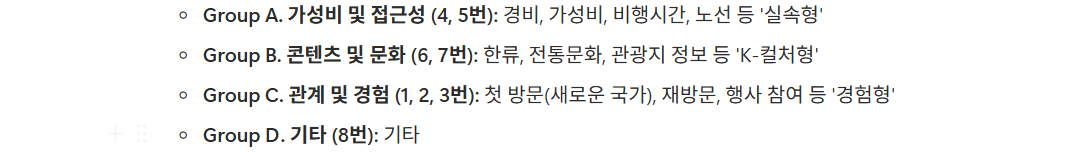

In [14]:
df['문1-1. 한국여행 관심 계기_1'].unique()

array([6, 7, 2, 5, 4, 1, 8, 3], dtype=int64)

In [15]:
df['문1-1. 한국여행 관심 계기_1'] = df['문1-1. 한국여행 관심 계기_1'].replace({
    4:'가성비 및 접근성', 5:'가성비 및 접근성', 
    6: '콘텐츠 및 문화', 7: '콘텐츠 및 문화',
    1: '경험형', 2: '경험형', 3: '경험형',
    8: '기타'})

In [16]:
df['문1-1. 한국여행 관심 계기_1'].unique()

array(['콘텐츠 및 문화', '경험형', '가성비 및 접근성', '기타'], dtype=object)

## 문3-1. 고려한 관광활동_1

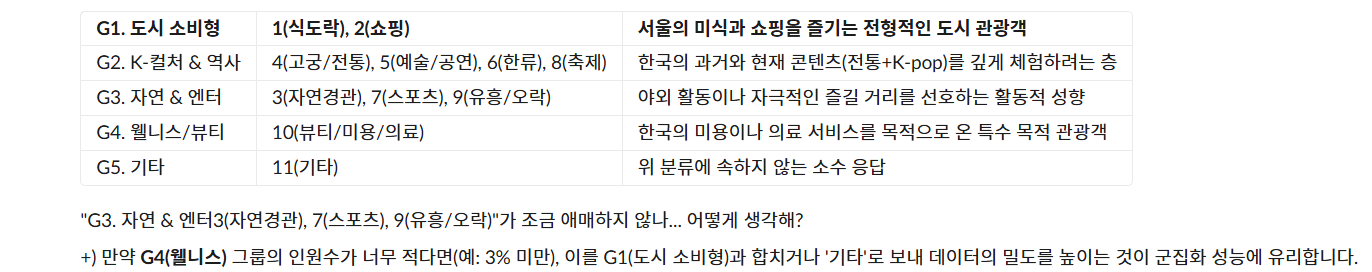

### 1,2,3 순위 EDA

In [41]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')
raw123 = raw[['아이디', '문3-1. 고려한 관광활동_1순위', '문3-1. 고려한 관광활동_2순위', '문3-1. 고려한 관광활동_3순위']]
raw123.head()

,아이디,문3-1. 고려한 관광활동_1순위,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위
0,57,1.0,2.0,NaN
1,58,11.0,2.0,1.0
2,59,12.0,5.0,2.0
3,60,11.0,2.0,6.0
4,61,1.0,NaN,NaN


In [42]:
activity = pd.merge(left=df, right=raw123, on='아이디', how='inner')
activity

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위
0,57,2,5,4,콘텐츠 및 문화,1.0,3,가족형,1,서울 심층형,451.666667,6.0,1.0,2.0,NaN
1,58,2,4,4,콘텐츠 및 문화,9.0,6,가족형,1,서울 단기형,272.935000,5.0,11.0,2.0,1.0
2,59,2,3,3,콘텐츠 및 문화,10.0,2,단체형,1,서울 심층형,177.650000,6.0,12.0,5.0,2.0
3,60,1,2,1,콘텐츠 및 문화,9.0,2,혼자형,1,서울 심층형,153.780000,6.0,11.0,2.0,6.0
4,61,2,2,4,경험형,1.0,4,가족형,2,서울 단기형,329.460000,5.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,19271,2,2,1,가성비 및 접근성,3.0,3,친구형,1,수도권/지방형(탐험가형),126.316000,5.0,3.0,1.0,4.0
10133,19273,2,4,2,가성비 및 접근성,3.0,5,친구형,1,수도권/지방형(탐험가형),112.586000,5.0,3.0,2.0,1.0
10134,19274,1,4,2,콘텐츠 및 문화,10.0,4,가족형,1,수도권/지방형(탐험가형),52.860500,5.0,12.0,3.0,1.0
10135,19275,2,5,1,가성비 및 접근성,10.0,7,가족형,1,수도권/지방형(탐험가형),535.470000,5.0,13.0,NaN,NaN


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

<Axes: xlabel='문3-1. 고려한 관광활동_1순위', ylabel='count'>

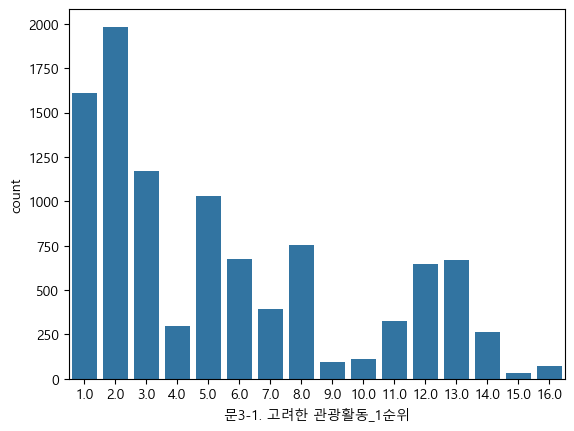

In [45]:
sns.countplot(x='문3-1. 고려한 관광활동_1순위',data=activity)

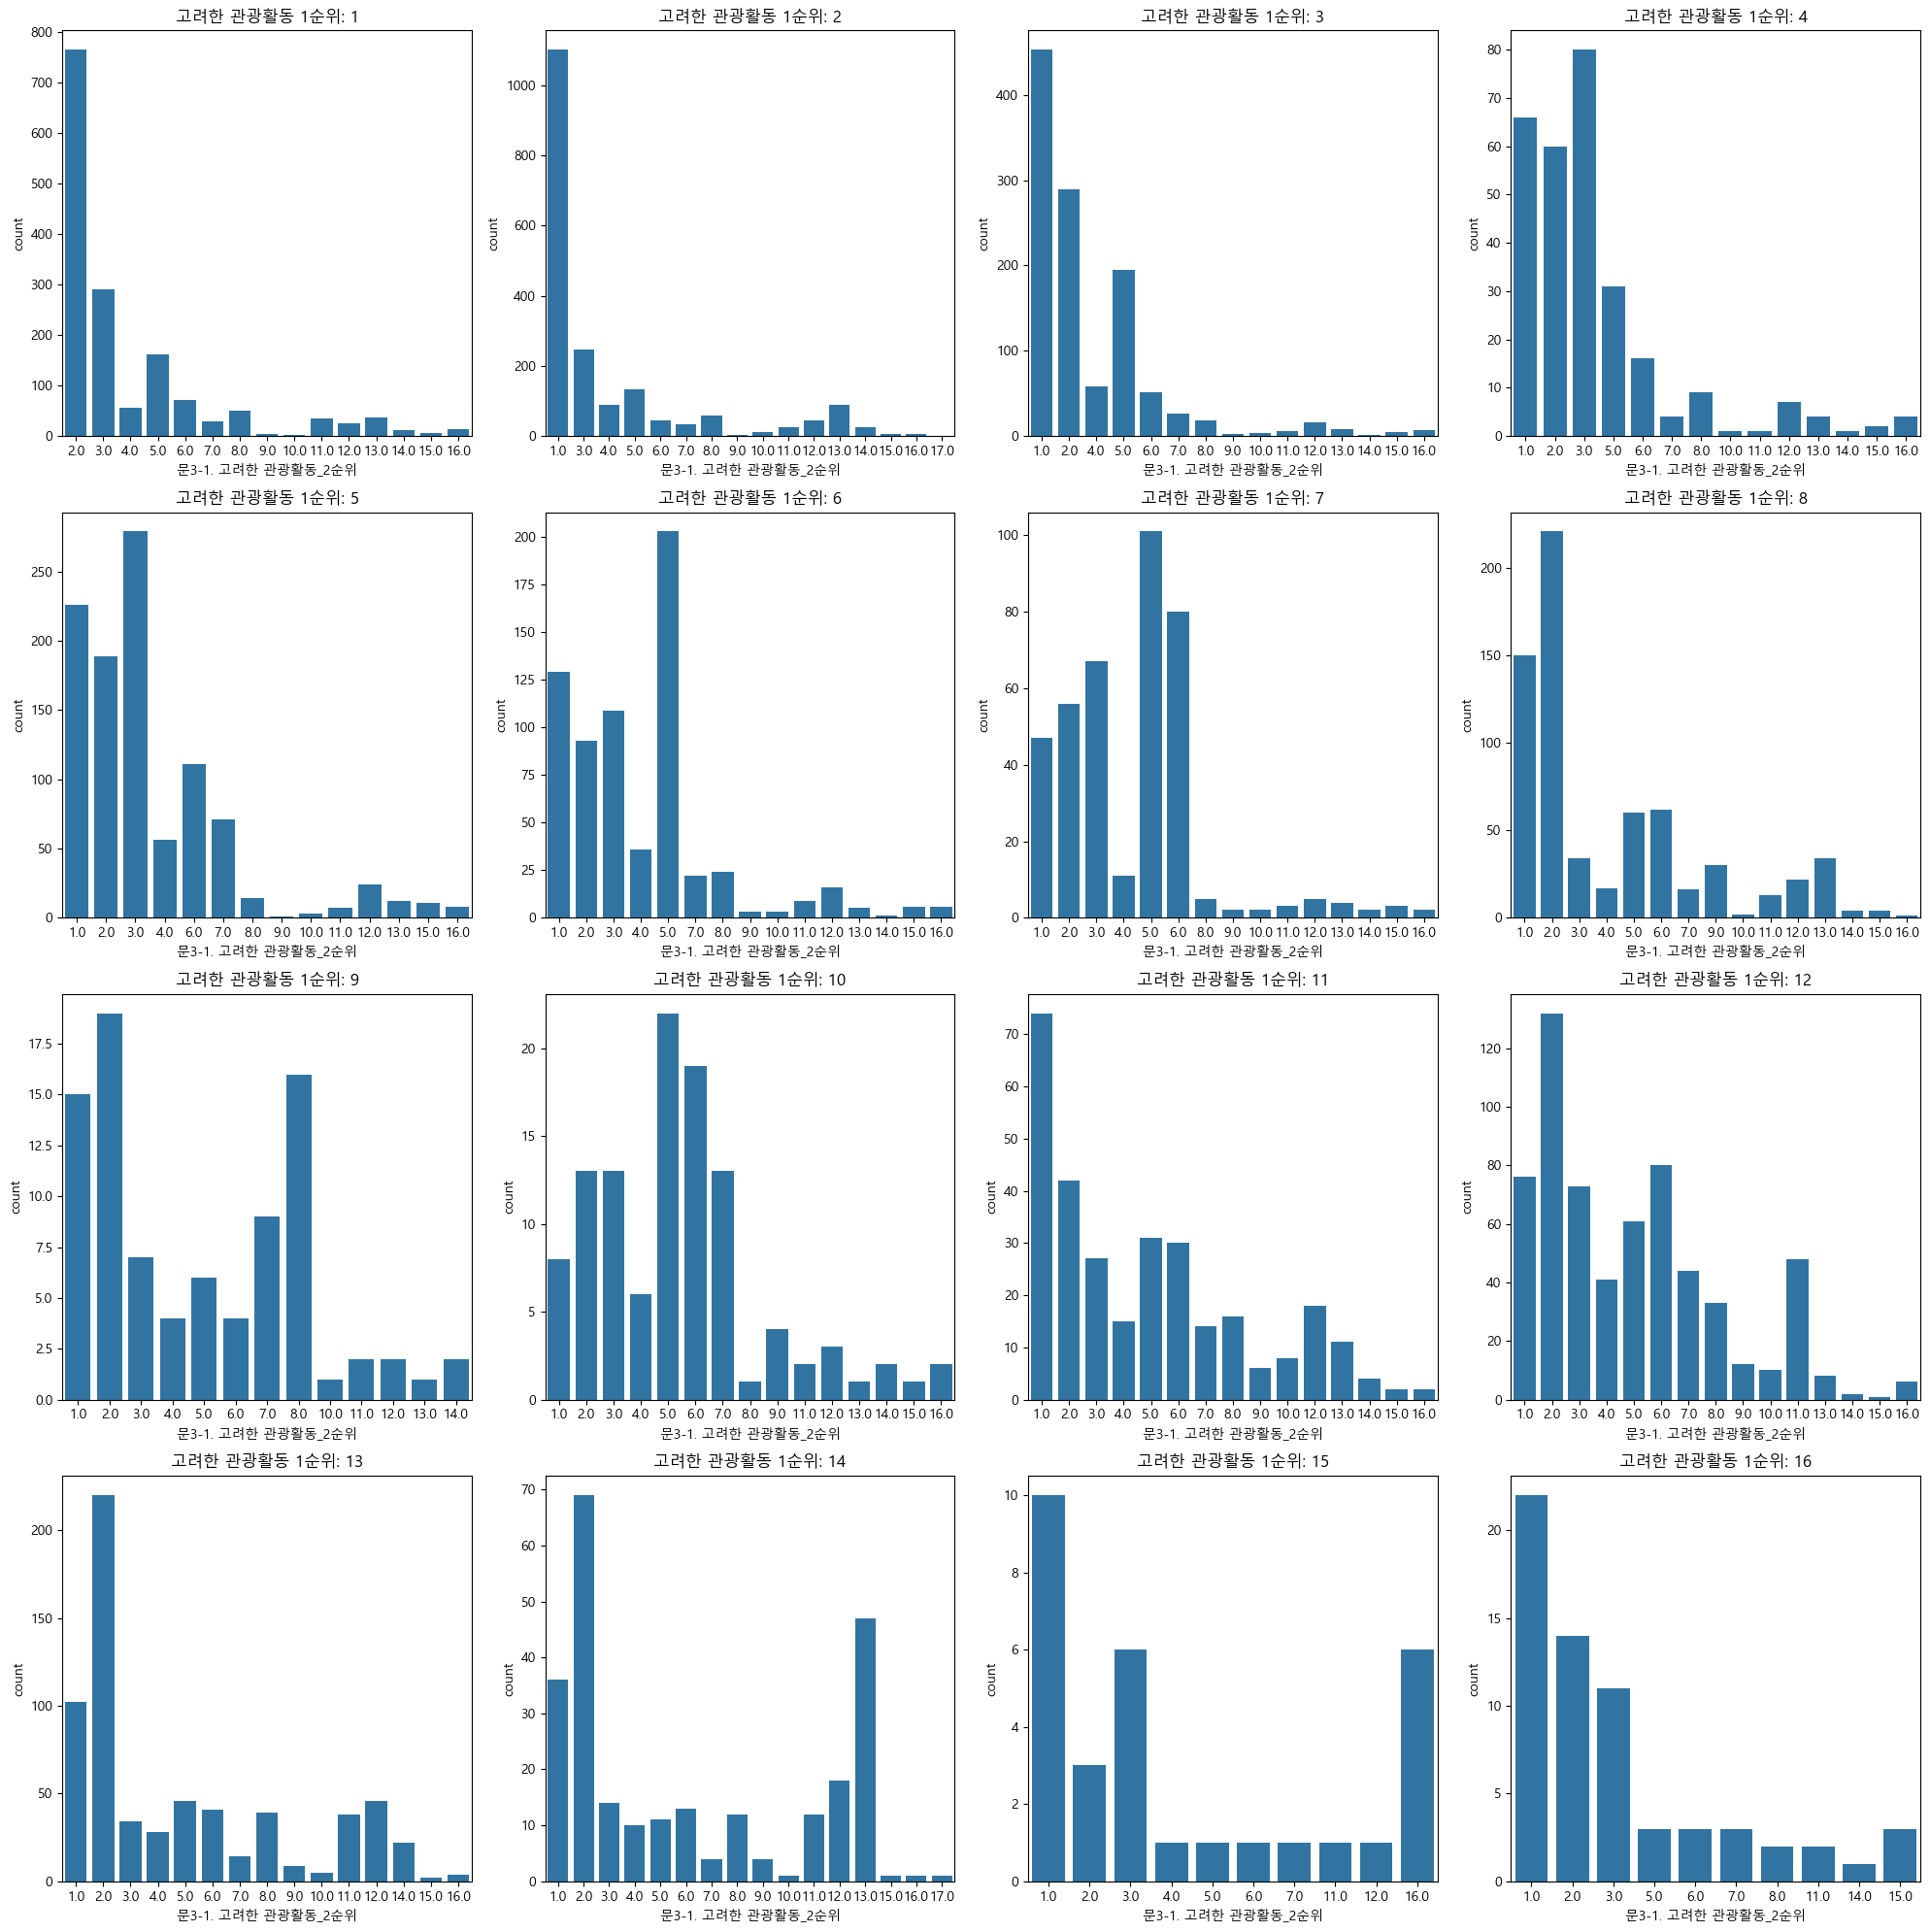

In [50]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i in range(16):
    sns.countplot(x='문3-1. 고려한 관광활동_2순위', data=activity[activity['문3-1. 고려한 관광활동_1순위']==float(i+1)], ax=ax[i//4,i%4])
    ax[i//4,i%4].set_title(f'고려한 관광활동 1순위: {i+1}')
    
plt.tight_layout()

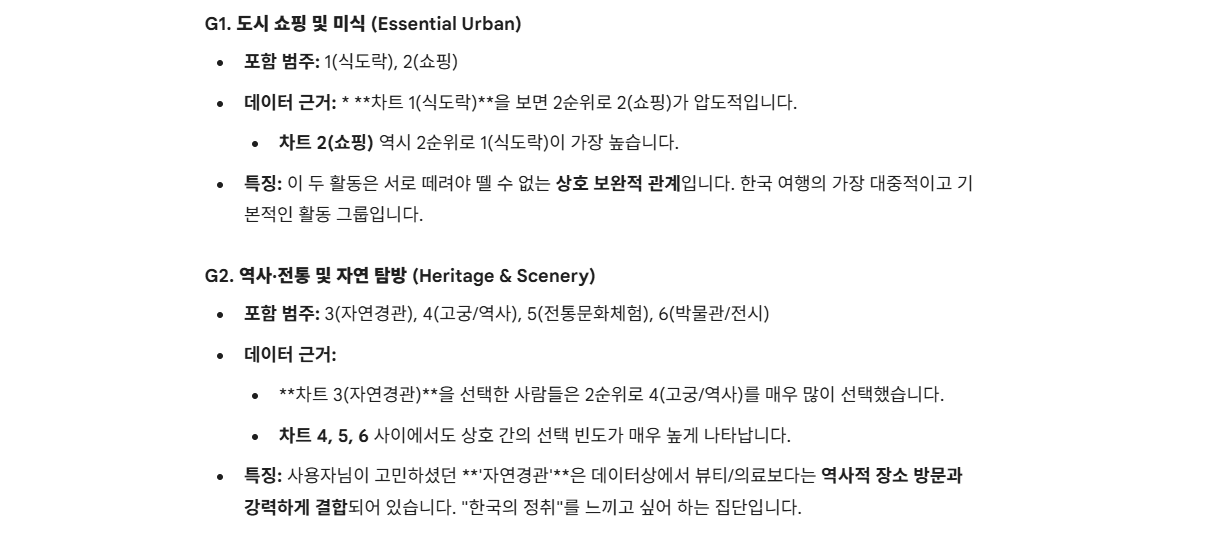

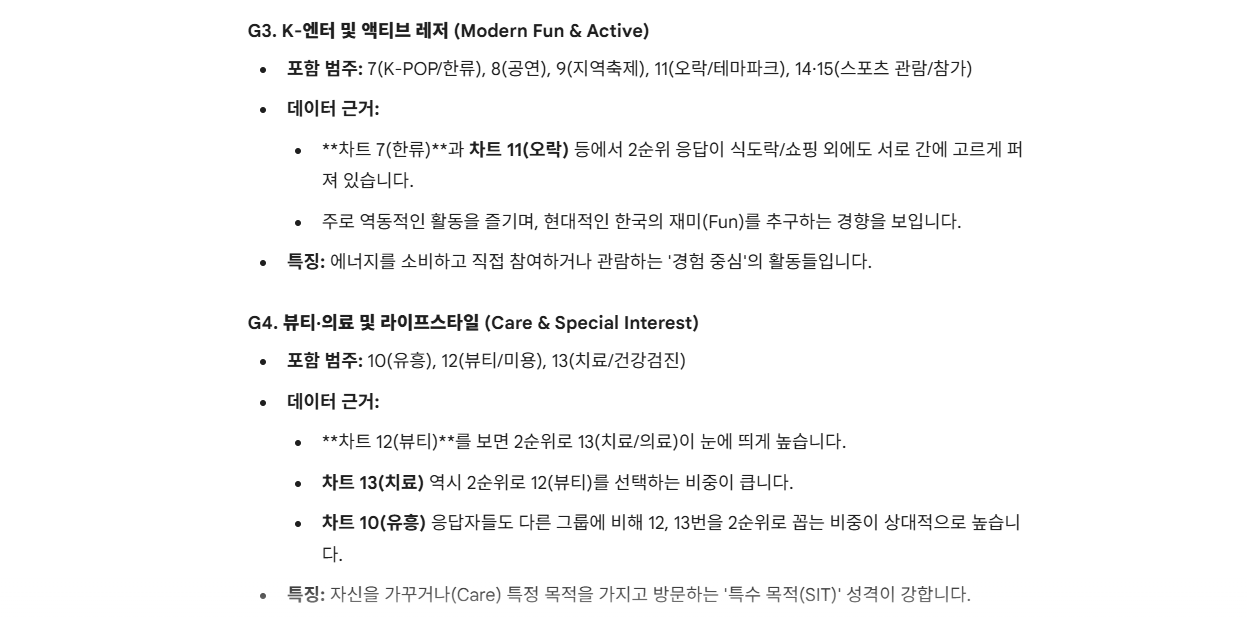

In [53]:
activity.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1', '여행동반자_그룹', '방문 지역 수', '여행 패턴',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '문3-1. 고려한 관광활동_1순위', '문3-1. 고려한 관광활동_2순위', '문3-1. 고려한 관광활동_3순위'],
      dtype='object')

In [ ]:
activity.drop(columns=['문3-1. 고려한 관광활동_1','문3-1. 고려한 관광활동_2순위', '문3-1. 고려한 관광활동_3순위'], inplace=True)

In [58]:
activity.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-2. 고려한 관광인프라_1', '여행동반자_그룹', '방문 지역 수', '여행 패턴',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '문3-1. 고려한 관광활동_1순위'],
      dtype='object')

In [60]:
activity['문3-1. 고려한 관광활동_1순위'] = activity['문3-1. 고려한 관광활동_1순위'].replace({
    1: '도시 소비형', 2: '도시 소비형',
    3: '역사, 전통, 자연', 4: '역사, 전통, 자연', 5: '역사, 전통, 자연', 6: '역사, 전통, 자연', 
    7: '경험형', 8: '경험형', 9: '경험형', 11: '경험형', 14: '경험형', 15: '경험형',
    10: '특수 목적', 12: '특수 목적', 13: '특수 목적'
})

In [61]:
activity['문3-1. 고려한 관광활동_1순위'].unique()

array(['도시 소비형', '경험형', '특수 목적', '역사, 전통, 자연', 16.0], dtype=object)

16(기타)는 2순위 선택 결과에 따라 범주 포함시키자

In [63]:
activity = pd.merge(left=activity, right=raw123, on='아이디', how='inner')

In [ ]:
tmp = activity[activity['문3-1. 고려한 관광활동_1순위_x']==16.0]
tmp

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위_x,문3-1. 고려한 관광활동_1순위_y,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위
11,77,1,3,3,기타,2,가족형,1,서울 단기형,271.320000,5.0,16.0,16.0,2.0,3.0
14,80,1,2,1,콘텐츠 및 문화,5,가족형,2,서울 단기형,432.820000,5.0,16.0,16.0,2.0,5.0
15,81,2,3,1,경험형,3,가족형,2,수도권/지방형(탐험가형),432.820000,5.0,16.0,16.0,2.0,1.0
30,123,2,2,1,경험형,2,친구형,2,서울 심층형,168.544350,6.0,16.0,16.0,1.0,2.0
70,194,1,3,1,경험형,6,가족형,1,서울 단기형,164.730000,5.0,16.0,16.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,17984,2,4,4,콘텐츠 및 문화,1,혼자형,1,서울 심층형,262.868750,8.0,16.0,16.0,11.0,9.0
9683,18398,2,2,1,경험형,5,단체형,3,서울 단기형,381.140000,5.0,16.0,16.0,11.0,5.0
9726,18513,2,4,4,경험형,2,친구형,1,서울 심층형,293.714286,7.0,16.0,16.0,2.0,NaN
9910,18883,2,3,1,경험형,4,단체형,3,서울 단기형,296.100000,5.0,16.0,16.0,5.0,1.0


In [69]:
tmp[tmp['문3-1. 고려한 관광활동_2순위'].isna()]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위_x,문3-1. 고려한 관광활동_1순위_y,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위
141,324,1,4,2,콘텐츠 및 문화,4,혼자형,2,서울 심층형,247.633333,6.0,16.0,16.0,NaN,NaN
226,507,2,2,4,가성비 및 접근성,5,친구형,2,수도권/지방형(탐험가형),319.750000,6.0,16.0,16.0,NaN,NaN
302,679,1,4,1,경험형,3,가족형,2,수도권/지방형(탐험가형),157.762500,12.0,16.0,16.0,NaN,NaN
577,1285,1,5,1,경험형,1,가족형,1,서울 단기형,266.458333,4.0,16.0,16.0,NaN,NaN
7195,13686,2,2,4,기타,6,혼자형,1,서울 단기형,256.600000,2.0,16.0,16.0,NaN,NaN
8343,15823,2,3,1,가성비 및 접근성,6,친구형,1,수도권/지방형(탐험가형),363.953333,3.0,16.0,16.0,NaN,NaN


2순위도 선택 안 한 row는 제거(6개)

In [71]:
drop_index = tmp[tmp['문3-1. 고려한 관광활동_2순위'].isna()].index
drop_index

Index([141, 226, 302, 577, 7195, 8343], dtype='int64')

In [73]:
activity.drop(drop_index, inplace=True)

In [75]:
activity[activity['문3-1. 고려한 관광활동_1순위_x']==16.0]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위_x,문3-1. 고려한 관광활동_1순위_y,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위
11,77,1,3,3,기타,2,가족형,1,서울 단기형,271.320000,5.0,16.0,16.0,2.0,3.0
14,80,1,2,1,콘텐츠 및 문화,5,가족형,2,서울 단기형,432.820000,5.0,16.0,16.0,2.0,5.0
15,81,2,3,1,경험형,3,가족형,2,수도권/지방형(탐험가형),432.820000,5.0,16.0,16.0,2.0,1.0
30,123,2,2,1,경험형,2,친구형,2,서울 심층형,168.544350,6.0,16.0,16.0,1.0,2.0
70,194,1,3,1,경험형,6,가족형,1,서울 단기형,164.730000,5.0,16.0,16.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,17984,2,4,4,콘텐츠 및 문화,1,혼자형,1,서울 심층형,262.868750,8.0,16.0,16.0,11.0,9.0
9683,18398,2,2,1,경험형,5,단체형,3,서울 단기형,381.140000,5.0,16.0,16.0,11.0,5.0
9726,18513,2,4,4,경험형,2,친구형,1,서울 심층형,293.714286,7.0,16.0,16.0,2.0,NaN
9910,18883,2,3,1,경험형,4,단체형,3,서울 단기형,296.100000,5.0,16.0,16.0,5.0,1.0


In [77]:
# 매핑 딕셔너리
activity_map = {
    1: '도시 소비형', 2: '도시 소비형',
    3: '역사, 전통, 자연', 4: '역사, 전통, 자연', 
    5: '역사, 전통, 자연', 6: '역사, 전통, 자연', 
    7: '경험형', 8: '경험형', 9: '경험형', 
    11: '경험형', 14: '경험형', 15: '경험형',
    10: '특수 목적', 12: '특수 목적', 13: '특수 목적'
}

# 조건 마스크
mask = activity['문3-1. 고려한 관광활동_1순위_x'] == 16.0

# 조건에 해당하는 row만 치환
activity.loc[mask, '문3-1. 고려한 관광활동_1순위_x'] = (
    activity.loc[mask, '문3-1. 고려한 관광활동_2순위']
    .map(activity_map)
)

In [78]:
activity[activity['문3-1. 고려한 관광활동_1순위_x'] == 16.0]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위_x,문3-1. 고려한 관광활동_1순위_y,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위


In [ ]:
activity.drop(columns=['문3-1. 고려한 관광활동_1순위_y', '문3-1. 고려한 관광활동_2순위','문3-1. 고려한 관광활동_3순위'], inplace=True)
activity.rename(columns={'문3-1. 고려한 관광활동_1순위_x': '문3-1. 고려한 관광활동_1순위'}, inplace=True)
activity.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-2. 고려한 관광인프라_1', '여행동반자_그룹', '방문 지역 수', '여행 패턴',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '문3-1. 고려한 관광활동_1순위'],
      dtype='object')

## 고려한 관광인프라

In [83]:
activity['문3-2. 고려한 관광인프라_1'] = activity['문3-2. 고려한 관광인프라_1'].replace({
    1 : '여행 편의성', 2 : '여행 편의성', 6 : '여행 편의성', 8 : '여행 편의성',
    3 : '안전 및 퀄리티', 5 : '안전 및 퀄리티', 7 : '안전 및 퀄리티',
    4 : '가성비',
    9: '기타'})

In [84]:
activity.head()

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위
0,57,2,5,4,콘텐츠 및 문화,안전 및 퀄리티,가족형,1,서울 심층형,451.666667,6.0,도시 소비형
1,58,2,4,4,콘텐츠 및 문화,여행 편의성,가족형,1,서울 단기형,272.935000,5.0,경험형
2,59,2,3,3,콘텐츠 및 문화,여행 편의성,단체형,1,서울 심층형,177.650000,6.0,특수 목적
3,60,1,2,1,콘텐츠 및 문화,여행 편의성,혼자형,1,서울 심층형,153.780000,6.0,경험형
4,61,2,2,4,경험형,가성비,가족형,2,서울 단기형,329.460000,5.0,도시 소비형


<Axes: xlabel='문3-2. 고려한 관광인프라_1', ylabel='count'>

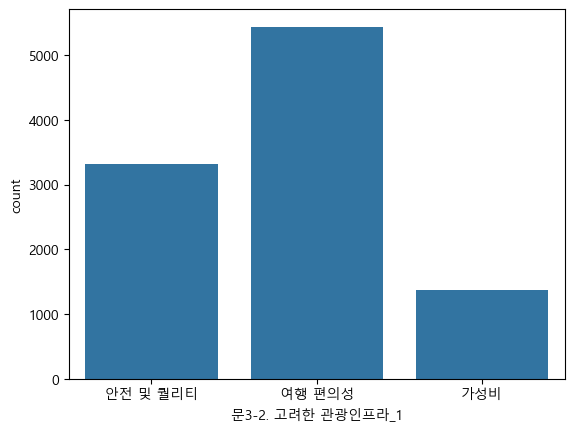

In [86]:
sns.countplot(x='문3-2. 고려한 관광인프라_1',data=activity)

In [85]:
activity.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_7차_전처리.csv', index=False)